In [1]:
import pandas as pd

## read data

In [2]:
df = pd.read_csv("../Datasets/houses_to_rent.csv")

In [3]:
df

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [4]:
df.animal.unique()

array(['acept', 'not acept'], dtype=object)

In [5]:
df.furniture.unique()

array(['furnished', 'not furnished'], dtype=object)

In [6]:
# categorical data
# Define categorical variables
df['animal'] = pd.Categorical(df['animal'])
df['furniture'] = pd.Categorical(df['furniture'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null category
furniture         6080 non-null category
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: category(2), int64(6), object(6)
memory usage: 582.2+ KB


In [8]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [9]:
def convert(col):
    ret = list()
    for i in col:
        if type(i) == int:
            ret.append(i)
        else:
            i = i.replace('R$','')
            if "," in i:
                i = i.replace(',','')
            if "-" in i:
                i = i.replace('-',"0")
            if i in ["Sem info", "Incluso"]:
                i = 0
            ret.append(i)
    return(ret)
        
    

In [10]:
df["hoa"] = convert(df["hoa"])
df["rent amount"] = convert(df["rent amount"])
df["property tax"] = convert(df["property tax"])
df["fire insurance"] = convert(df["fire insurance"])
df["total"] = convert(df["total"])
df["floor"] = convert(df["floor"])


In [11]:
df

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,950,42,13,1255
6078,6078,1,160,3,2,2,0,not acept,not furnished,0,3500,250,53,3803


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null category
furniture         6080 non-null category
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: category(2), int64(6), object(6)
memory usage: 582.2+ KB


In [13]:
df["hoa"] = df["hoa"].astype('int64')
df["rent amount"] = df["rent amount"].astype('int64')
df["property tax"] = df["property tax"].astype('int64')
df["fire insurance"] = df["fire insurance"].astype('int64')
df["total"] = df["total"].astype('int64')
df["floor"] = df["floor"].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null category
furniture         6080 non-null category
hoa               6080 non-null int64
rent amount       6080 non-null int64
property tax      6080 non-null int64
fire insurance    6080 non-null int64
total             6080 non-null int64
dtypes: category(2), int64(12)
memory usage: 582.2 KB


In [15]:
#Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

In [16]:
df

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_not acept,furniture_not furnished
0,0,1,240,3,3,4,0,0,8000,1000,121,9121,0,0
1,1,0,64,2,1,1,10,540,820,122,11,1493,0,1
2,2,1,443,5,5,4,3,4172,7000,1417,89,12680,0,0
3,3,1,73,2,2,1,12,700,1250,150,16,2116,0,1
4,4,1,19,1,1,0,0,0,1200,41,16,1257,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,420,1150,0,15,1585,0,1
6076,6076,1,84,2,2,1,16,768,2900,63,37,3768,1,0
6077,6077,0,48,1,1,0,13,250,950,42,13,1255,0,1
6078,6078,1,160,3,2,2,0,0,3500,250,53,3803,1,1


In [17]:
Features = df.loc[:,df.columns != 'total']
labels =  df.loc[:,'total']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Features,
                                                    labels,
                                                    test_size=0.2)

In [20]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

 ## simple one


In [23]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
regressor.score(X_test,y_test)

0.9999993038393814

In [22]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.9999993038393814

In [25]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

0.24651061076692193

In [26]:
rf = RandomForestRegressor().fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.2370779137268697

In [27]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [28]:
models=[LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=["LR", "DT",'RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
r_square=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    r_square.append(metrics.r2_score(y_test,test_pred))
d={'Modelling Algo':model_names,'r_square':r_square}   
d
    

C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\iad7kor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Modelling Algo': ['LR',
  'DT',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'r_square': [0.9999993038393813,
  0.2466486206687346,
  0.25003674065646797,
  0.24051145093438986,
  0.24423569482773833,
  -0.02439798967050444,
  0.2596449774352685]}

In [31]:
r_square =pd.DataFrame(d)
r_square

,Modelling Algo,r_square
0,LR,0.999999
1,DT,0.246649
2,RandomForestRegressor,0.250037
3,AdaBoostRegressor,0.240511
4,BaggingRegressor,0.244236
5,SVR,-0.024398
6,KNeighborsRegressor,0.259645


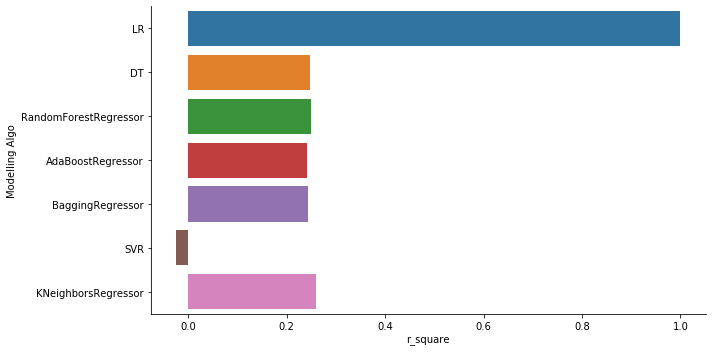

In [32]:
import seaborn as sns
sns.factorplot(y='Modelling Algo',x='r_square',data=r_square,kind='bar',size=5,aspect=2)


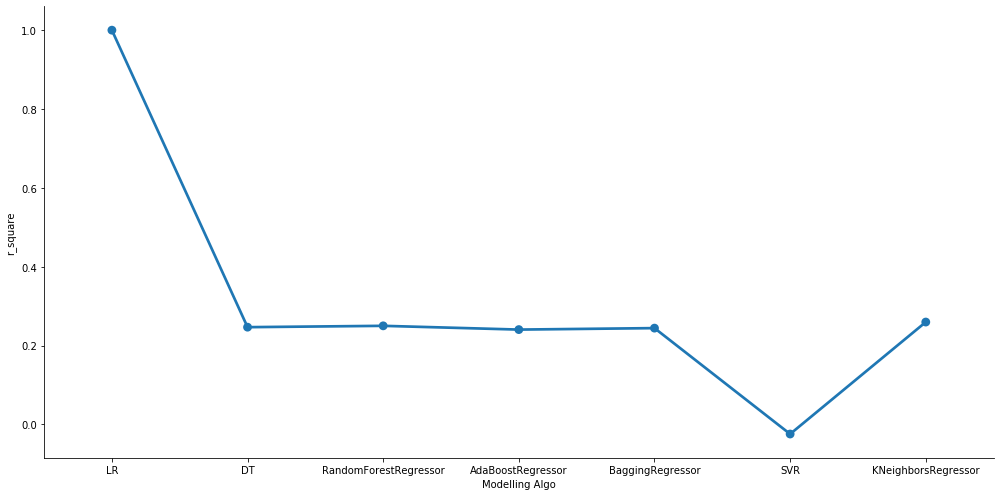

In [33]:
sns.factorplot(x='Modelling Algo',y='r_square',data=r_square,kind='point',size=7,aspect=2)